# Chapter 2: Deep Learning with PyTorch

 This chapter covers
 
* PyTorch tensors and basic operations* Preparing data for deep learning in PyTorch
* Building and training deep neural networks with PyTorch 
* Conducting binary and multi-category classifications with deep learning * Creating a validation set to decide training stop points



In this book, we’ll use deep neural networks to generate a wide range of content, including text, images, shapes, music, and more. I assume you possess a prior familiarity with the inner workings of machine learning (ML), and specifically, a foundational understanding of artificial neural networks. Throughout this chapter, I’ll refresh your memory on a few key concepts such as loss functions, activation functions, optimizers, and the learning rate, which constitute indispensable elements in the development and training of deep neural networks. Should there be any gaps in your knowledge pertaining to these concepts, it is strongly encouraged that you rectify them before progressing further with projects in this book. 
Generative AI models are frequently confronted with the task of either binary or multi-category classification. For instance, in Generative Adversarial Networks (GANs), the discriminator undertakes the essential role of a binary classifier, its purpose being to distinguish between the fake samples created by the generator from real samples from the training set. Similarly, in the context of text generation models, whether in recurrent neural networks or Transformers, the overarching objective is to predict the subsequent character or word from an extensive array of possibilities (essentially a multi-category classification task).

In this chapter, you’ll learn how to use PyTorch to create deep neural networks to perform binary and multi-category classifications so that you become well-versed in deep learning and classification tasks. 
Specifically, you’ll engage in an end-to-end deep learning project in PyTorch, on a quest to classify grayscale images of clothing items into different categories such as coats, bags, sneakers, shirts, and so on. The intention is to prepare you for the creation of deep neural networks, capable of performing both binary and multi-category classification tasks in PyTorch. This, in turn, will get you ready for the upcoming chapters, where you use deep neural networks in PyTorch to create various generative models.

To train generative AI models, we harness a diverse range of data formats such as raw text, audio files, image pixels, and arrays of numbers. Deep neural networks created in PyTorch cannot take these forms of data directly as inputs. Instead, we must first convert them into a format that the neural networks understand and accept. Specifically, you’ll convert various forms of raw data into PyTorch tensors (fundamental data structures used to represent and manipulate data) before feeding them to generative AI models. Therefore, in this chapter, you’ll also learn the basics of data types, how to create various forms of PyTorch tensors, and how to use them in deep learning. 

# 1. Data Types in PyTorch 

## 1.1. Create PyTorch Tensors

In [1]:
heights = [189, 170, 189, 163, 183, 171, 185,
           168, 173, 183, 173, 173, 175, 178,
           183, 193, 178, 173, 174, 183, 183,
           180, 168, 180, 170, 178, 182, 180,
           183, 178, 182, 188, 175, 179, 183,
           193, 182, 183, 177, 185, 188, 188,
           182, 185, 191, 183]

In [2]:
import torch

heights_tensor = torch.tensor(heights,    #A
           dtype=torch.float64)    #B

In [3]:
t1=torch.IntTensor([1, 2, 3])    #A 
t2=torch.tensor([1, 2, 3],
             dtype=torch.int)    #B
print(t1)
print(t2)

tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [4]:
tensor1 = torch.zeros(2, 3)
print(tensor1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
tensor2 = torch.ones(1,4,5)
print(tensor2)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


In [6]:
import numpy as np

nparr=np.array(range(10))
pt_tensor=torch.tensor(nparr, dtype=torch.int)
print(pt_tensor)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.int32)


## 1.2. Index and Slice PyTorch Tensors

In [7]:
height = heights_tensor[2]
print(height)

tensor(189., dtype=torch.float64)


In [8]:
height = heights_tensor[-2]
print(height)

tensor(191., dtype=torch.float64)


In [9]:
five_heights = heights_tensor[-5:]
print(five_heights)

tensor([188., 182., 185., 191., 183.], dtype=torch.float64)


## 1.3. PyTorch Tensor Shapes


In [10]:
print(heights_tensor.shape)

torch.Size([46])


In [11]:
heights_in_feet = heights_tensor / 30.48
print(heights_in_feet)

tensor([6.2008, 5.5774, 6.2008, 5.3478, 6.0039, 5.6102, 6.0696, 5.5118, 5.6759,
        6.0039, 5.6759, 5.6759, 5.7415, 5.8399, 6.0039, 6.3320, 5.8399, 5.6759,
        5.7087, 6.0039, 6.0039, 5.9055, 5.5118, 5.9055, 5.5774, 5.8399, 5.9711,
        5.9055, 6.0039, 5.8399, 5.9711, 6.1680, 5.7415, 5.8727, 6.0039, 6.3320,
        5.9711, 6.0039, 5.8071, 6.0696, 6.1680, 6.1680, 5.9711, 6.0696, 6.2664,
        6.0039], dtype=torch.float64)


In [12]:
heights_2_measures = torch.cat(
    [heights_tensor,heights_in_feet], dim=0)
print(heights_2_measures.shape)

torch.Size([92])


In [13]:
heights_reshaped = heights_2_measures.reshape(2, 46)
print(heights_reshaped)

tensor([[189.0000, 170.0000, 189.0000, 163.0000, 183.0000, 171.0000, 185.0000,
         168.0000, 173.0000, 183.0000, 173.0000, 173.0000, 175.0000, 178.0000,
         183.0000, 193.0000, 178.0000, 173.0000, 174.0000, 183.0000, 183.0000,
         180.0000, 168.0000, 180.0000, 170.0000, 178.0000, 182.0000, 180.0000,
         183.0000, 178.0000, 182.0000, 188.0000, 175.0000, 179.0000, 183.0000,
         193.0000, 182.0000, 183.0000, 177.0000, 185.0000, 188.0000, 188.0000,
         182.0000, 185.0000, 191.0000, 183.0000],
        [  6.2008,   5.5774,   6.2008,   5.3478,   6.0039,   5.6102,   6.0696,
           5.5118,   5.6759,   6.0039,   5.6759,   5.6759,   5.7415,   5.8399,
           6.0039,   6.3320,   5.8399,   5.6759,   5.7087,   6.0039,   6.0039,
           5.9055,   5.5118,   5.9055,   5.5774,   5.8399,   5.9711,   5.9055,
           6.0039,   5.8399,   5.9711,   6.1680,   5.7415,   5.8727,   6.0039,
           6.3320,   5.9711,   6.0039,   5.8071,   6.0696,   6.1680,   6.1680,
  

In [14]:
print(heights_reshaped[1,-2])

tensor(6.2664, dtype=torch.float64)


In [15]:
print(heights_reshaped[1,-2])

tensor(6.2664, dtype=torch.float64)


## 1.4. Mathematical Operations on PyTorch Tensors
We can conduct mathematical operations on PyTorch tensors by using different methods such as mean(), median(), sum(), max(), and so on. For example, to find the median height of the 46 presidents in centimeters, we can do this:

In [16]:
print(torch.median(heights_reshaped[0,:]))

tensor(182., dtype=torch.float64)


In [17]:
print(torch.mean(heights_reshaped,dim=1))

tensor([180.0652,   5.9077], dtype=torch.float64)


In [18]:
values, indices = torch.max(heights_reshaped, dim=1)
print(values)
print(indices)

tensor([193.0000,   6.3320], dtype=torch.float64)
tensor([15, 15])


# 2. An End-to-End Deep Learning Project with PyTorch

## 2.1. Download and Visualize the Data
You can download the Fashion MNIST data directly from Torchvision datasets. 

In [19]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T

torch.manual_seed(42)
transform=T.Compose([
    T.ToTensor(),
    T.Normalize([0.5],[0.5])])

In [20]:
train_set=torchvision.datasets.FashionMNIST(    #A
    root=".",    #B
    train=True,    #C
    download=True,    #D
    transform=transform)    #E
test_set=torchvision.datasets.FashionMNIST(root=".",
    train=False,download=True,transform=transform)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 3.98MB/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 60.2MB/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.5MB/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [21]:
print(train_set[0])

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -

In [22]:
# got labels here https://github.com/pranay414/Fashion-MNIST-Pytorch 
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

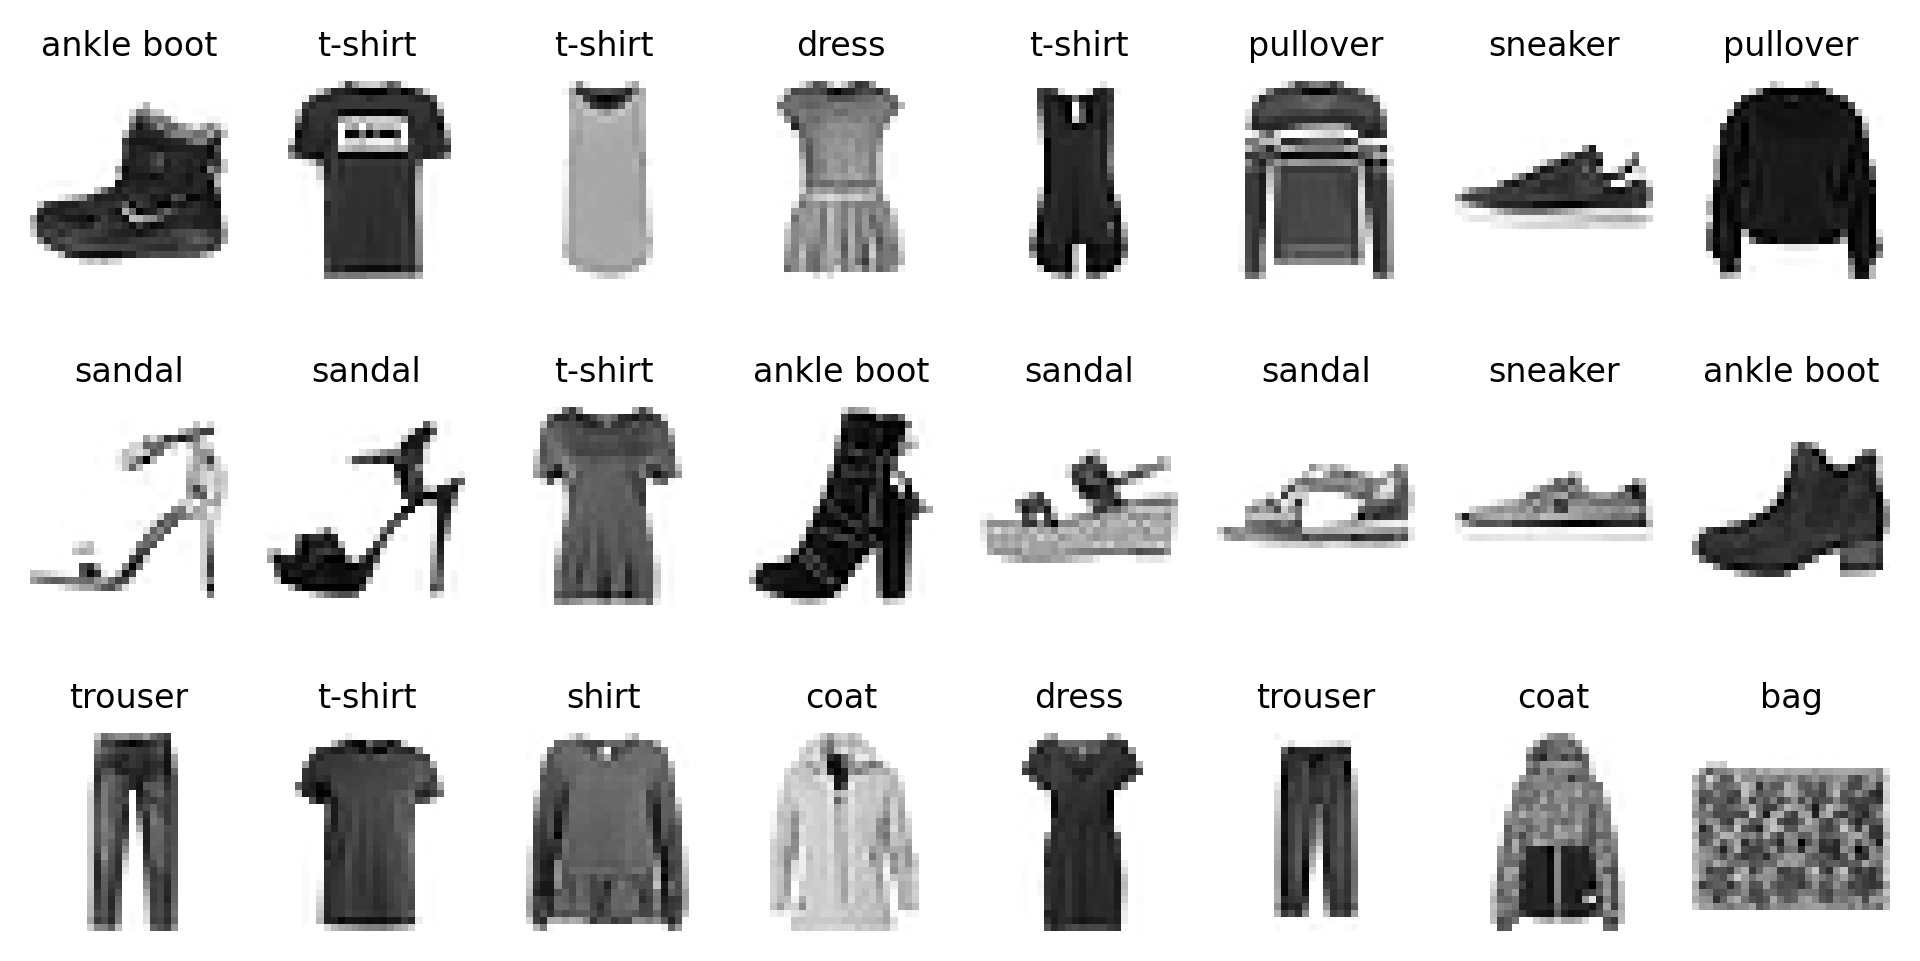

In [23]:
import matplotlib.pyplot as plt

plt.figure(dpi=300,figsize=(8,4))
for i in range(24):
    ax=plt.subplot(3, 8, i + 1)    #A
    img=train_set[i][0]    #B
    img=img/2+0.5    #C
    img=img.reshape(28, 28)    #D
    plt.imshow(img,
               cmap="binary")
    plt.axis('off')
    plt.title(text_labels[train_set[i][1]],    #E
        fontsize=8)
plt.show()

## 2.2. Create Batches 


In [24]:
binary_train_set = [x for x in train_set if x[1] in [0,9]]
binary_test_set = [x for x in test_set if x[1] in [0,9]]

We only keep samples with labels 0 or 9. Let's check the sample size as follows:

In [25]:
batch_size=64
binary_train_loader=torch.utils.data.DataLoader(
    binary_train_set,    #A
    batch_size=batch_size,    #B
    shuffle=True)    #C
binary_test_loader=torch.utils.data.DataLoader(
    binary_test_set,    #D
    batch_size=batch_size,shuffle=True)

# 3. Binary Classification 

## 3.1. Create A Neural Network for Binary Classification

In [26]:
device="cuda" if torch.cuda.is_available() else "cpu"    #A

binary_model=nn.Sequential(    #B
    nn.Linear(28*28,256),    #C
    nn.ReLU(),    #D
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,32),
    nn.ReLU(),
    nn.Linear(32,1),
    nn.Dropout(p=0.25),
    nn.Sigmoid()).to(device)    #E

In [27]:
lr=0.001
optimizer=torch.optim.Adam(binary_model.parameters(),lr=lr)
loss_fn=nn.BCELoss()

## 3.2. Train the Binary Classifier


In [28]:
for i in range(50):    #A
    tloss=0
    for n,(imgs,labels) in enumerate(binary_train_loader):    #B
        imgs=imgs.reshape(-1,28*28)    #C
        imgs=imgs.to(device)
        labels=torch.FloatTensor(\
          [x if x==0 else 1 for x in labels])    #D
        labels=labels.reshape(-1,1).to(device)
        preds=binary_model(imgs)    
        loss=loss_fn(preds,labels)    #E
        optimizer.zero_grad()
        loss.backward()    #F
        optimizer.step()
        tloss+=loss
    tloss=tloss/n
    print(f"at epoch {i}, loss is {tloss}")

at epoch 0, loss is 0.19023607671260834
at epoch 1, loss is 0.17607159912586212
at epoch 2, loss is 0.1800561249256134
at epoch 3, loss is 0.17833466827869415
at epoch 4, loss is 0.17326126992702484
at epoch 5, loss is 0.17811772227287292
at epoch 6, loss is 0.175819993019104
at epoch 7, loss is 0.172201007604599
at epoch 8, loss is 0.17624734342098236
at epoch 9, loss is 0.1770370900630951
at epoch 10, loss is 0.1757885366678238
at epoch 11, loss is 0.17163705825805664
at epoch 12, loss is 0.17277421057224274
at epoch 13, loss is 0.1769046038389206
at epoch 14, loss is 0.17752273380756378
at epoch 15, loss is 0.17560498416423798
at epoch 16, loss is 0.1805746704339981
at epoch 17, loss is 0.1734013706445694
at epoch 18, loss is 0.1769118458032608
at epoch 19, loss is 0.17252278327941895
at epoch 20, loss is 0.17653478682041168
at epoch 21, loss is 0.1795949786901474
at epoch 22, loss is 0.17395101487636566
at epoch 23, loss is 0.17705121636390686
at epoch 24, loss is 0.176938623189926

## 3.3. Calculate the Accuracy of the Binary Classifier

In [29]:
import numpy as np

results=[]
for imgs,labels in binary_test_loader:    #A
    imgs=imgs.reshape(-1,28*28).to(device)
    labels=torch.FloatTensor(\
         [x if x==0 else 1 for x in labels])
    labels=(labels).reshape(-1,1).to(device)
    preds=binary_model(imgs)
    pred10=torch.where(preds>0.5,1,0)
    correct=(pred10==labels)    #B
    results.append(correct.detach().cpu()\
      .numpy().mean())    #C
accuracy=np.array(results).mean()    #D
print(f"the accuracy of the predictions is {accuracy}")     

the accuracy of the predictions is 0.8779296875


# 4. Multi-Category Classification


## 4.1. Validation Set and Early Stopping


In [30]:
torch.manual_seed(42)
train_set,val_set=torch.utils.data.random_split(\
    train_set,[50000,10000])
train_loader=torch.utils.data.DataLoader(
    train_set,    
    batch_size=batch_size,   
    shuffle=True)   
val_loader=torch.utils.data.DataLoader(
    val_set,    
    batch_size=batch_size,   
    shuffle=True)
test_loader=torch.utils.data.DataLoader(
    test_set,    
    batch_size=batch_size,   
    shuffle=True)

In [31]:
class EarlyStop:
    def __init__(self, patience=10):
        self.patience = patience
        self.steps = 0
        self.min_loss = float('inf')
    def stop(self, val_loss):
        if val_loss < self.min_loss:
            self.min_loss = val_loss
            self.steps = 0
        elif val_loss >= self.min_loss:
            self.steps += 1
        if self.steps >= self.patience:
            return True
        else:
            return False
stopper=EarlyStop()

## 4.2. A Multi-Category Classification Model


In [32]:
model=nn.Sequential(
    nn.Linear(28*28,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)).to(device)

In [33]:
lr=0.001
optimizer=torch.optim.Adam(model.parameters(),lr=lr)
loss_fn=nn.CrossEntropyLoss()

## 4.3. Train the Multi-Category Classifier
 

In [34]:
def train_epoch():
    tloss=0
    for n,(imgs,labels) in enumerate(train_loader):    
        imgs=imgs.reshape(-1,28*28).to(device)
        labels=labels.reshape(-1,).to(device)
        preds=model(imgs)    
        loss=loss_fn(preds,labels)
        optimizer.zero_grad()
        loss.backward()    
        optimizer.step()
        tloss+=loss
    return tloss/n  

In [35]:
def val_epoch():
    vloss=0
    for n,(imgs,labels) in enumerate(val_loader):    
        imgs=imgs.reshape(-1,28*28).to(device)
        labels=labels.reshape(-1,).to(device)
        preds=model(imgs)    
        loss=loss_fn(preds,labels)    
        vloss+=loss
    return vloss/n 

In [36]:
for i in range(1,101):    
    tloss=train_epoch()
    vloss=val_epoch()
    print(f"at epoch {i}, tloss is {tloss}, vloss is {vloss}")
    if stopper.stop(vloss)==True:             
        break  

at epoch 1, tloss is 0.5360037088394165, vloss is 0.41210630536079407
at epoch 2, tloss is 0.3861232399940491, vloss is 0.39775538444519043
at epoch 3, tloss is 0.34591925144195557, vloss is 0.37837013602256775
at epoch 4, tloss is 0.3245319128036499, vloss is 0.3528192937374115
at epoch 5, tloss is 0.30110496282577515, vloss is 0.32581430673599243
at epoch 6, tloss is 0.28501585125923157, vloss is 0.3369586765766144
at epoch 7, tloss is 0.27235713601112366, vloss is 0.31972870230674744
at epoch 8, tloss is 0.2557087540626526, vloss is 0.3302297294139862
at epoch 9, tloss is 0.2431035041809082, vloss is 0.32600000500679016
at epoch 10, tloss is 0.2335035502910614, vloss is 0.32753118872642517
at epoch 11, tloss is 0.22308306396007538, vloss is 0.32728150486946106
at epoch 12, tloss is 0.21413542330265045, vloss is 0.3665117025375366
at epoch 13, tloss is 0.20472212135791779, vloss is 0.35870474576950073
at epoch 14, tloss is 0.19478844106197357, vloss is 0.342212438583374
at epoch 15, 

## 4.4. Calculate the Accuracy of the Multi-Category Classifier

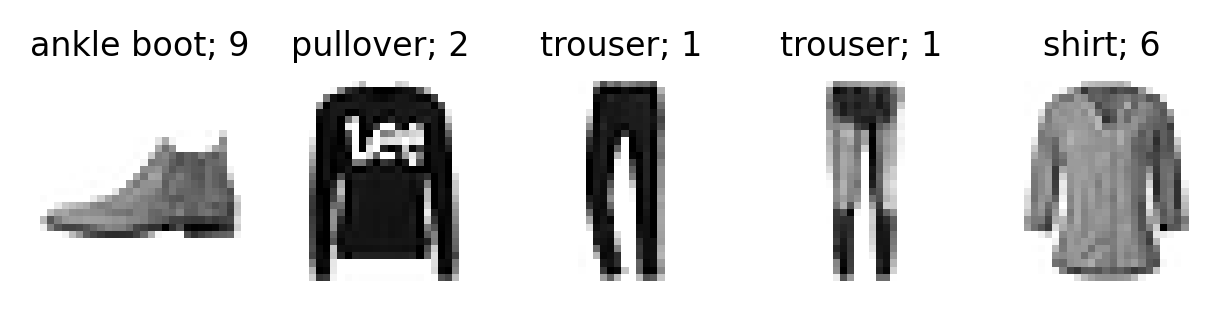

the label is 9; the prediction is 9
the label is 2; the prediction is 2
the label is 1; the prediction is 1
the label is 1; the prediction is 1
the label is 6; the prediction is 6


In [37]:
plt.figure(dpi=300,figsize=(5,1))
for i in range(5):
    ax=plt.subplot(1,5, i + 1)    
    img=test_set[i][0]    
    label=test_set[i][1]
    img=img/2+0.5    
    img=img.reshape(28, 28)    
    plt.imshow(img, cmap="binary")
    plt.axis('off')
    plt.title(text_labels[label]+f"; {label}", fontsize=8)
plt.show()
for i in range(5):
    img,label = test_set[i]
    img=img.reshape(-1,28*28).to(device)
    pred=model(img)   
    index_pred=torch.argmax(pred,dim=1)
    idx=index_pred.item()
    print(f"the label is {label}; the prediction is {idx}")   

In [38]:
import numpy as np
results=[]

for imgs,labels in test_loader:
    imgs=imgs.reshape(-1,28*28).to(device)
    labels=(labels).reshape(-1,).to(device)
    preds=model(imgs)
    pred10=torch.argmax(preds,dim=1)
    correct=(pred10==labels)
    results.append(correct.detach().cpu().numpy().mean())
    
accuracy=np.array(results).mean()

print(f"the accuracy of the predictions is {accuracy}")     

the accuracy of the predictions is 0.8872412420382165


In [39]:
# Exercise 2.1
t1=torch.DoubleTensor([5, 8, 10])    
t2=torch.tensor([5, 8, 10],
             dtype=torch.float64)    # or dtype=torch.double
print(t1)
print(t2)

tensor([ 5.,  8., 10.], dtype=torch.float64)
tensor([ 5.,  8., 10.], dtype=torch.float64)


In [40]:
# Exercise 2.2
tensor1 = torch.zeros(2, 3, 4)
print(tensor1)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


In [41]:
# Exercise 2.3
five_heights = heights_tensor[:5] # or five_heights = heights_tensor[0:5]
print(five_heights)

tensor([189., 170., 189., 163., 183.], dtype=torch.float64)


In [42]:
# Exercise 2.4
print(heights_reshaped[0,-1])

tensor(183., dtype=torch.float64)


In [43]:
# Exercise 2.5
values, indices = torch.min(heights_reshaped, dim=1)
print(values)
print(indices)

tensor([163.0000,   5.3478], dtype=torch.float64)
tensor([3, 3])


In [44]:
# A demonstration that nn.CrossEntropyLoss() combines nn.LogSoftmax() and nn.NLLLoss() in one single class
# instead of using nn.CrossEntropyLoss() and no SoftMax activation in the book
# here we use nn.LogSoftmax() activation and nn.NLLLoss() loss function
# results are the same as those in the book

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T

torch.manual_seed(42)
transform=T.Compose([
    T.ToTensor(),
    T.Normalize([0.5],[0.5])])
train_set=torchvision.datasets.FashionMNIST(    #A
    root=r"E:\temp",    #B
    train=True,    #C
    download=True,    #D
    transform=transform)    #E
test_set=torchvision.datasets.FashionMNIST(
    root=r"E:\temp",    #B
    train=False,
    download=True,
    transform=transform)

text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

import matplotlib.pyplot as plt

train_set,val_set=torch.utils.data.random_split(\
    train_set,[50000,10000])


batch_size=64
train_loader=torch.utils.data.DataLoader(
    train_set,    
    batch_size=batch_size,   
    shuffle=True)   
val_loader=torch.utils.data.DataLoader(
    val_set,    
    batch_size=batch_size,   
    shuffle=True)
test_loader=torch.utils.data.DataLoader(
    test_set,    
    batch_size=batch_size,   
    shuffle=True)

device="cuda" if torch.cuda.is_available() else "cpu"    #A

model=nn.Sequential(
    nn.Linear(28*28,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)).to(device) # note the LogSoftmax activation



lr=0.001
optimizer=torch.optim.Adam(model.parameters(),lr=lr)

# note the negative log likelihood loss NLLLoss()
loss_fn=nn.NLLLoss()


class EarlyStop:
    def __init__(self, patience=10):
        self.patience = patience
        self.steps = 0
        self.min_loss = float('inf')
    def stop(self, val_loss):
        if val_loss < self.min_loss:
            self.min_loss = val_loss
            self.steps = 0
        elif val_loss > self.min_loss:
            self.steps += 1
        if self.steps >= self.patience:
            return True
        else:
            return False


stopper=EarlyStop()

def train_epoch():
    tloss=0
    for n,(imgs,labels) in enumerate(train_loader):    #B
        imgs=imgs.reshape(-1,28*28).to(device)
        labels=labels.reshape(-1,).to(device)
        preds=model(imgs)    
        loss=loss_fn(preds,labels)
        optimizer.zero_grad()
        loss.backward()    #F
        optimizer.step()
        tloss+=loss
    return tloss/n    

def val_epoch():
    vloss=0
    for n,(imgs,labels) in enumerate(val_loader):    #B
        imgs=imgs.reshape(-1,28*28).to(device)
        labels=labels.reshape(-1,).to(device)
        preds=model(imgs)    
        loss=loss_fn(preds,labels)    #E
        vloss+=loss
    return vloss/n      

for i in range(1,101):    #A
    tloss=train_epoch()
    vloss=val_epoch()
    print(f"at epoch {i}, tloss is {tloss}, vloss is {vloss}")
    if stopper.stop(vloss)==True:             
        break    



import numpy as np
results=[]

for imgs,labels in test_loader:
    imgs=imgs.reshape(-1,28*28).to(device)
    labels=(labels).reshape(-1,).to(device)
    preds=model(imgs)
    pred10=torch.argmax(preds,dim=1)
    correct=(pred10==labels)
    results.append(correct.detach().cpu().numpy().mean())
    
accuracy=np.array(results).mean()

print(f"the accuracy of the predictions is {accuracy}")  

100%|██████████| 26.4M/26.4M [00:00<00:00, 112MB/s]


Extracting E:\temp/FashionMNIST/raw/train-images-idx3-ubyte.gz to E:\temp/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 3.85MB/s]

Extracting E:\temp/FashionMNIST/raw/train-labels-idx1-ubyte.gz to E:\temp/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 63.8MB/s]


Extracting E:\temp/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to E:\temp/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 12.4MB/s]


Extracting E:\temp/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to E:\temp/FashionMNIST/raw

at epoch 1, tloss is 0.5360037088394165, vloss is 0.41210630536079407
at epoch 2, tloss is 0.3861232399940491, vloss is 0.39775538444519043
at epoch 3, tloss is 0.34591925144195557, vloss is 0.37837013602256775
at epoch 4, tloss is 0.3245319128036499, vloss is 0.3528192937374115
at epoch 5, tloss is 0.30110496282577515, vloss is 0.32581430673599243
at epoch 6, tloss is 0.28501585125923157, vloss is 0.3369586765766144
at epoch 7, tloss is 0.27235713601112366, vloss is 0.31972870230674744
at epoch 8, tloss is 0.2557087540626526, vloss is 0.3302297294139862
at epoch 9, tloss is 0.2431035041809082, vloss is 0.32600000500679016
at epoch 10, tloss is 0.2335035502910614, vloss is 0.32753118872642517
at epoch 11, tloss is 0.22308306396007538, vloss is 0.32728150486946106
at epoch 12, tloss is 0.21413542330265045, vloss is 0.3665117025375366
at epoch 13, tloss is 0.20472212135791779, vloss is 0.3587047457